## Housekeeping

Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import plotly
import plotly.express
#import folium
%pwd

'C:\\Users\\si2320\\Downloads'

In [3]:
import plotly.express as px

## Macro-level Analysis

Let's look at the population distribution in North Carolina and establish some initial descriptive statistics.

In [2]:
tiers = pd.read_excel('NC Development Tier Rankings 2016.xls')
tiers.head()
tiers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   COUNTY                                            100 non-null    object 
 1   Adjusted Property Tax Base Per Capita FY 2015-16  100 non-null    int64  
 2   Population Growth July 2011-July 2014             100 non-null    float64
 3   Median HouseHold Income 2013                      100 non-null    int64  
 4   Unemployment 12 mth avg                           100 non-null    float64
 5   County Rank Sum                                   100 non-null    int64  
 6   Economic Distress Rank                            100 non-null    int64  
 7   Population Less Prison July 2014                  100 non-null    int64  
 8   Poverty Rate 5-year                               100 non-null    float64
 9   2014 tier             

In [4]:
tier_pop = tiers[['COUNTY','Median HouseHold Income 2013', 'Population Less Prison July 2014','Poverty Rate 5-year','Final 2016 Tier']]

In [6]:
tier_pop

,COUNTY,Median HouseHold Income 2013,Population Less Prison July 2014,Poverty Rate 5-year,Final 2016 Tier
0,ALAMANCE,43001,155789,0.183,2
1,ALEXANDER,46064,36680,0.172,2
2,ALLEGHANY,37086,11099,0.198,1
3,ANSON,33443,24063,0.242,1
4,ASHE,35155,27448,0.211,1
...,...,...,...,...,...
95,WAYNE,41526,124926,0.221,2
96,WILKES,35895,69642,0.227,2
97,WILSON,40772,81410,0.232,2
98,YADKIN,40998,37842,0.185,2


In [6]:
tier_pop.sort_values('Population Less Prison July 2014')

,COUNTY,Median HouseHold Income 2013,Population Less Prison July 2014,Poverty Rate 5-year,Final 2016 Tier
88,TYRRELL,32642,3645,0.208,1
47,HYDE,36681,5077,0.256,1
37,GRAHAM,33553,8829,0.211,1
14,CAMDEN,60537,10251,0.060,1
51,JONES,39602,10468,0.167,1
...,...,...,...,...,...
25,CUMBERLAND,44038,329403,0.170,2
33,FORSYTH,46163,364005,0.186,3
40,GUILFORD,46093,512273,0.181,3
91,WAKE,65433,982473,0.110,3


In [7]:
print(np.mean(tier_pop['Median HouseHold Income 2013']))
print(np.std(tier_pop['Median HouseHold Income 2013']))

41649.33
7488.6385919671675


Mean income in North Carolina was \\$41649.33,  with a Standard Deviation of \\$7488.64

In [8]:
print(np.mean(tier_pop['Population Less Prison July 2014']))
print(np.std(tier_pop['Population Less Prison July 2014']))

99093.59
153343.09877663848


We see that the standard deviation of the population is much higher than the mean population. This indicates that there's some skewing of the population distribution. Let's plot to see this.

Text(0.5, 1.0, 'Population Distribution in North Carolina')

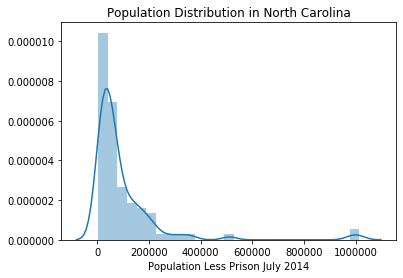

In [9]:
#Standard Deviation is MUCH greater than the mean. Plot population
pop_plot =sns.distplot(tier_pop['Population Less Prison July 2014'], hist= True)
pop_plot.set_title("Population Distribution in North Carolina")

The frequency of counties seems to trail off after 200,000. Let's zoom in.

Text(0.5, 1.0, 'Population Distribution ')

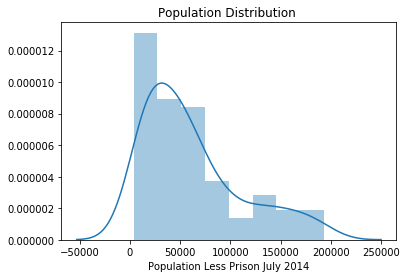

In [10]:
tier_pop_200k = tier_pop.loc[tier_pop['Population Less Prison July 2014'] < 200000]
zoom_plot= sns.distplot(tier_pop_200k['Population Less Prison July 2014'], hist= True)
zoom_plot.set_title("Population Distribution ")

In [11]:
print(len(tier_pop_200k['Population Less Prison July 2014']))
print(len(tier_pop.loc[tier_pop['Population Less Prison July 2014'] < 50000]))
print(len(tier_pop.loc[tier_pop['Population Less Prison July 2014'] < 10000]))

90
46
3


90% of North Carolina's counties are below 200k in population, and 46% of North Carolina's counties are below 50k.
Using USDA Definitions (https://www.ers.usda.gov/topics/rural-economy-population/rural-classifications/what-is-rural/), this means that 46% of NC counties can be classified as Non-Metro. Non-Metro can be further drilled into Non-Micro, or counties with less than 10000 people. There are 3 such counties in North Carolina.

In [12]:
most_rural = tier_pop.loc[tier_pop['Population Less Prison July 2014'] < 10000]
most_rural

,COUNTY,Median HouseHold Income 2013,Population Less Prison July 2014,Poverty Rate 5-year,Final 2016 Tier
37,GRAHAM,33553,8829,0.211,1
47,HYDE,36681,5077,0.256,1
88,TYRRELL,32642,3645,0.208,1


In [13]:
Most_rural_sum = np.sum(most_rural['Population Less Prison July 2014'])
Total_sum = np.sum(tier_pop['Population Less Prison July 2014'])
print((Most_rural_sum/Total_sum)*100)


0.17711539162119366


In [14]:
kind_of_rural = tier_pop.loc[tier_pop['Population Less Prison July 2014'] < 50000]
kind_of_rural_sum = np.sum(kind_of_rural['Population Less Prison July 2014'])
print((kind_of_rural_sum/Total_sum)*100)

11.597571548270679


North Carolina's most rural counties are .177% of the state's overall population. Expanding the definition to counties below 50k accounts for 11.598% of the state's population-- so while 46% of the state's counties meet some definition of rural, they only hold 11.598% of the total population.

In [15]:
Mecklenburg_County_Percent = ((1013199 / Total_sum) * 100)
print(Mecklenburg_County_Percent)
Wake_County_Percent = ((982473 / Total_sum) * 100)
print(Wake_County_Percent)
Guilford_County_Percent = ((512273 / Total_sum) * 100)
print(Guilford_County_Percent)

Three_biggest = Mecklenburg_County_Percent + Wake_County_Percent + Guilford_County_Percent
print(Three_biggest)

10.224667407851506
9.914596897740813
5.169587659504515
25.308851965096835


In contrast, NC's three biggest counties account for over 25% of the state's population. This is important when considering the Tier designations, especially as the UNC Board of Governors dictated that they want to increase rural population by increasing enrollment from Tier 1 and Tier 2 counties. Let's analyze Tier 1 a bit.

## Tier 1 Analysis

In [16]:
tier_1 = tier_pop.loc[tier_pop['Final 2016 Tier'] == 1]
tier_1.sort_values('Population Less Prison July 2014')

,COUNTY,Median HouseHold Income 2013,Population Less Prison July 2014,Poverty Rate 5-year,Final 2016 Tier
88,TYRRELL,32642,3645,0.208,1
47,HYDE,36681,5077,0.256,1
37,GRAHAM,33553,8829,0.211,1
14,CAMDEN,60537,10251,0.060,1
51,JONES,39602,10468,0.167,1
21,CLAY,37078,10794,0.243,1
2,ALLEGHANY,37086,11099,0.198,1
36,GATES,48194,11912,0.196,1
93,WASHINGTON,31596,12679,0.237,1
71,PERQUIMANS,42504,13638,0.202,1


In [17]:
len(tier_1['Population Less Prison July 2014'])

40

There are 8 Tier 1 counties where the population is >50,000, 20% of the counties in this tier.

In [18]:
tier_1_sum = np.sum(tier_1['Population Less Prison July 2014'])
#print(tier_1_sum)
tier_1_over_50k = tier_1.loc[tier_1['Population Less Prison July 2014'] > 50000]
tier_1_over_50k_sum = np.sum(tier_1_over_50k['Population Less Prison July 2014'])
#print(tier_1_over_50k_sum)
over_50k_percent = (tier_1_over_50k_sum / tier_1_sum) *100
print(over_50k_percent)

44.72243250440595


### 44.72% of Tier 1's population is not rural.

In [19]:
#tier_1.sort_values('Median HouseHold Income 2013')

In [20]:
#first_std= np.mean(tier_pop['Median HouseHold Income 2013']) - np.std(tier_pop['Median HouseHold Income 2013'])
#print(first_std)

In [21]:
#below_std = tier_1.loc[tier_1['Median HouseHold Income 2013'] < first_std]
#below_std.sort_values('Population Less Prison July 2014')

In [22]:
#len(below_std)

There are 15 Tier 1 counties where the Median HouseHold income is more than one standard deviation below the state's median household income. 11 of these counties have a population below 50,000.

## Tier 2 Analysis

In [23]:
tier_2 = tier_pop.loc[tier_pop['Final 2016 Tier'] == 2]
tier_2.sort_values('Population Less Prison July 2014')

,COUNTY,Median HouseHold Income 2013,Population Less Prison July 2014,Poverty Rate 5-year,Final 2016 Tier
68,PAMLICO,43517,12573,0.138,2
60,MITCHELL,38303,15825,0.183,2
5,AVERY,34933,16142,0.180,2
74,POLK,43665,20740,0.167,2
56,MADISON,37479,21584,0.173,2
26,CURRITUCK,57577,25072,0.098,2
19,CHEROKEE,34476,27451,0.179,2
87,TRANSYLVANIA,40578,33428,0.143,2
27,DARE,52083,35415,0.088,2
1,ALEXANDER,46064,36680,0.172,2


In [24]:
tier_2_over_50k = tier_2.loc[tier_2['Population Less Prison July 2014'] > 50000]
print(len(tier_2_over_50k["Population Less Prison July 2014"]))
print(len(tier_2['Population Less Prison July 2014']))

26
40


26 counties in Tier 2 are not rural, 65% of this tier's counties.

In [25]:
tier_2_sum = np.sum(tier_2['Population Less Prison July 2014'])
#print(tier_2_sum)
tier_2_over_50k = tier_2.loc[tier_2['Population Less Prison July 2014'] > 50000]
tier_2_over_50k_sum = np.sum(tier_2_over_50k['Population Less Prison July 2014'])
#print(tier_2_over_50k_sum)
tier_2_over_50k_percent = (tier_2_over_50k_sum / tier_2_sum) *100
print(tier_2_over_50k_percent)

87.94232592476779


### 87.94 of Tier 2's population is not rural.

In [26]:
tier1and2_sum = tier_1_sum + tier_2_sum
tier1and2_over50k =tier_1_over_50k_sum + tier_2_over_50k_sum
tier1and2_over50k_percent = (tier1and2_over50k / tier1and2_sum) *100
print(tier1and2_over50k_percent)

75.75159311196661


### 75.75% of the population in these two tiers is not rural.

This is especially troubling considering that the UNC strategic plan does not make any mention of specifically looking at the rural portion of these two counties:

"*Rural: By fall 2021, increase enrollment
of students from Tier 1 and Tier 2 counties by
11% over fall 2016 levels (an average of 2% per
year) to reduce the existing participation gap
by at least half*" - Page 9, UNC Strategic Plan https://www.northcarolina.edu/wp-content/uploads/reports-and-documents/strategic-plan/unc_strategic_plan.pdf

In [27]:
#kind_of_rural

## Plotting tiers on a map + locating UNC Insitutions

Let's shift gears quickly and make a map of tier designations.

In [7]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [29]:
#! conda install geopandas

In [8]:
map_counties = pd.read_csv('nc-commerce-tiers.csv')
map_counties
values = map_counties['County Distress Ranking Tier'].tolist()
fips = map_counties['Combined FIPS'].tolist()
fips = [str(i) for i in fips] # convert 'fips' to string

map_counties = map_counties.astype({'Combined FIPS': str})
map_counties = map_counties.rename(columns = {"Combined FIPS": "fips", "County Distress Ranking Tier": "Tier"})
map_counties.sort_values("Tier")
type(map_counties['fips'][0])
map_counties['Tier'] = map_counties.Tier.astype(str)
map_counties.sort_values(by="Tier", inplace=True)
map_counties.head()

,stfips,areatype,area,Unnamed: 3,areadigest,County,fips,Year,periodtype,period,Tier,Select date,longdate
49,37,4,99,NaN,8142B13C9A642D2D532CBD691B91E9EC,Jackson County,37099,2016,1,0,1,Annual~2016,Annual
37,37,4,75,NaN,5A769323F4FF6AC5CE4F1BBCF6E268F0,Graham County,37075,2016,1,0,1,Annual~2016,Annual
39,37,4,79,NaN,3506FE9A45927BA09B5F8EF31923B549,Greene County,37079,2016,1,0,1,Annual~2016,Annual
41,37,4,83,NaN,1A47AFA56A7662F944EACE2EC68DAE11,Halifax County,37083,2016,1,0,1,Annual~2016,Annual
45,37,4,91,NaN,8A0868DA247AD432F05229CCDCE03300,Hertford County,37091,2016,1,0,1,Annual~2016,Annual


In [11]:
from urllib.request import urlopen
import json
import plotly.graph_objects as go

######################################################################################
### STEP 1: load in a GeoJSON file containing geometry information for US counties ###
######################################################################################
# GeoJSON is a JSON based format designed to represent the geographical features with their non-spatial attributes. 
# This format defines different JSON (JavaScript Object Notation) objects and their joining fashion. JSON format 
# represents a collective information about the Geographical features, their spatial extents, and properties.
# An object of this file may indicate a geometry (Point, LineString, Polygon), a feature or collection of features. 
# The features reflect addresses and places as point’s streets, main roads and borders as line strings and countries,
# provinces, and land regions as polygons. Using the GeoJSON, different mobile routing and navigation applications 
# can indicate the coverage of their services. An extension of GeoJSON is TopoJSON that is smaller in size and encodes
# geospatial topology.
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
    
###############################################################################
### STEP 2: Examine if the GeoJSON file has the 'fip' values in the dataset ###
###############################################################################
# retrieve the 'id' values from the GeoJSON file
county_ids = [d['id'] for d in counties['features']]

# examine how many values from 'fip' are in 'counties_ids'
present_fips = list(set(fips) & set(county_ids))
missing_fips = list(set(fips) - set(county_ids))
diff_county_ids = list(set(county_ids) - set(fips))
print(str(len(present_fips)) + "/" + str(len(fips)) + " 'fip' values are present in 'county_ids'")
print(str(len(diff_county_ids)) + "/" + str(len(county_ids)) + " 'county_ids' are absent from 'fip'")

# Note: It seems like all the 'fip' values from 'map_counties' are present in this GeoJSON file. 

############################################################
### STEP 3: Subset the GeoJSON file to relevant counties ###
############################################################
geojson_subset = [d for d in counties['features'] if d['id'] in fips]
nc_state = {'type': 'FeatureCollection', 'features': [d for d in counties['features'] if d['properties']['STATE'] == '37']}
len(geojson_subset)

####################################
### STEP 4: Generate choropleth ###
####################################
NC_map = plotly.express.choropleth(map_counties, geojson=nc_state, locations="fips", color= "Tier", color_continuous_scale = "Viridis", range_color=(0, 3), scope='usa', labels = 'County Distress Ranking Tier')
NC_map.update_geos(fitbounds = "locations", visible = False)

NC_map.update_layout(
    title_text = 'North Carolina Counties Mapped by Economic Distress <br> Alongside UNC Institution Locations',
    geo_scope='usa', # limite map scope to USA
)

##STEP 5: Add UNC ##
#https://stackoverflow.com/questions/58141818/plotly-chloropleth-combined-with-scattergeo
locs = pd.read_csv('UNC lat long2.csv', encoding = "ISO-8859-1")

NC_map.add_trace(
    go.Scattergeo(
        lon = locs['lon'],
        lat = locs['lat'],
        text = locs['Institution'],
        mode = 'markers',
        marker_color= 'black',
        textposition="top left",
        textfont_size= 13
    ))


# fig.add_trace(
#     go.Scattergeo(
#         lon = df_jake['lng'],
#         lat = df_jake['lat'],
#         text = df_jake['Name']+', '+df_jake['Link'],
#         mode = 'markers'
#     ))
NC_map.show()

##Overlay

100/100 'fip' values are present in 'county_ids'
3121/3221 'county_ids' are absent from 'fip'


In [88]:
#instructions from https://towardsdatascience.com/how-to-create-a-hub-and-spoke-plot-with-plotly-d11d65a4200

distpath = pd.read_csv('ncdistpath3.csv', encoding = "ISO-8859-1")
distpath['distance'] = distpath['distance'].astype(str)

for i in range(len(distpath)):
    NC_map.add_trace(
        go.Scattergeo(
            lon = [distpath['start_lon'][i],distpath['lon'][i]],
            lat = [distpath['start_lat'][i],distpath['lat'][i]],
            text = distpath['distance'][i],
            mode = 'markers+lines+text',
            line = dict(width = 1,color = 'black'),
            textposition = 'bottom right',
            showlegend =False,
        
        )
    )
NC_map.show()

## NC Tiers With Income Labelled by County

In [32]:
#! pip install -U kaleido
#! pip install -U orca

In [33]:
###RECREATE NC TIER MAP###

with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

county_ids = [d['id'] for d in counties['features']]

present_fips = list(set(fips) & set(county_ids))
missing_fips = list(set(fips) - set(county_ids))
diff_county_ids = list(set(county_ids) - set(fips))
print(str(len(present_fips)) + "/" + str(len(fips)) + " 'fip' values are present in 'county_ids'")
print(str(len(diff_county_ids)) + "/" + str(len(county_ids)) + " 'county_ids' are absent from 'fip'")

geojson_subset = [d for d in counties['features'] if d['id'] in fips]
nc_state = {'type': 'FeatureCollection', 'features': [d for d in counties['features'] if d['properties']['STATE'] == '37']}
len(geojson_subset)

Tier_map = plotly.express.choropleth(map_counties, geojson=nc_state, locations="fips", color= "Tier", color_continuous_scale = "Viridis", range_color=(0, 3), scope='usa', labels = 'County Distress Ranking Tier')
Tier_map.update_geos(fitbounds = "locations", visible = False)

Tier_map.update_layout(
    title_text = 'North Carolina Counties Mapped by Economic Distress <br> Alongside Average Household Income',
    geo_scope='usa', # limite map scope to USA,
                    )

locs2 = pd.read_csv('countylatlonincome.csv', encoding = "ISO-8859-1")

Tier_map.add_trace(
    go.Scattergeo(
        lon = locs2['lon'],
        lat = locs2['lat'],
        text = locs2['Median HouseHold Income 2013'],
        mode = 'text',
        marker_color= 'black',
        textposition="middle center",
        textfont_size=7
    ))

Tier_map.show()
#Tier_map.write_image("images/tier_map.png")

100/100 'fip' values are present in 'county_ids'
3121/3221 'county_ids' are absent from 'fip'


In [34]:
####THIS DOESN'T WORK BECAUSE MY COMPUTER HATES ME####

# #Directions from https://plotly.com/python/county-choropleth/
# import plotly.figure_factory as ff
# #import geopandas
# map_counties= pd.read_csv('nc-commerce-tiers.csv')

# values = map_counties['County Distress Ranking Tier'].tolist()
# fips = map_counties['Combined FIPS'].tolist()

# colorscale = ["#8dd3c7", "#ffffb3", "#bebada", "#fb8072",
#               "#80b1d3", "#fdb462", "#b3de69", "#fccde5",
#               "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f",
#               "#8dd3c7", "#ffffb3", "#bebada", "#fb8072",
#               "#80b1d3", "#fdb462", "#b3de69", "#fccde5",
#               "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f",
#               "#8dd3c7", "#ffffb3", "#bebada", "#fb8072",
#               "#80b1d3", "#fdb462", "#b3de69", "#fccde5",
#               "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f"]

# fig = ff.create_choropleth(
#     fips=fips, values=values,
#     colorscale=colorscale, round_legend_values=True,
#     simplify_county=0, simplify_state=0,
#     county_outline={'color': 'rgb(15, 15, 55)', 'width': 0.5},
#     state_outline={'width': 1},
#     legend_title='Tiers',
#     title='North Carolina'
# )

# fig.layout.template = None
# fig.show()